<a href="https://colab.research.google.com/github/Wanzzrghh/GDGOC---PENUGASAN-5/blob/main/Gene_Expression_Bioinformatics_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage
from google.colab import files

In [2]:
uploaded = files.upload()


Saving Spellman.csv to Spellman.csv


In [3]:
df = pd.read_csv(next(iter(uploaded)))


In [4]:
print("Data Sample:")
print(df.head())
print("\nInfo Data:")
print(df.info())

Data Sample:
      time     40    50     60    70    80    90   100   110   120  ...   170  \
0  YAL001C -0.070 -0.23 -0.100  0.03 -0.04 -0.12 -0.28 -0.44 -0.09  ...  0.59   
1  YAL014C  0.215  0.09  0.025 -0.04 -0.04 -0.02 -0.51 -0.08  0.00  ... -0.30   
2  YAL016W  0.150  0.15  0.220  0.29 -0.10  0.15 -0.73  0.19 -0.15  ...  0.12   
3  YAL020C -0.350 -0.28 -0.215 -0.15  0.16 -0.12  0.26  0.00  0.13  ...  0.07   
4  YAL022C -0.415 -0.59 -0.580 -0.57 -0.09 -0.34  0.49  0.32  1.15  ... -0.48   

    180   190   200   210   220   230   240   250    260  
0  0.34 -0.28 -0.09 -0.44  0.31  0.03  0.57  0.00  0.010  
1 -0.38  0.07 -0.04  0.13 -0.06 -0.26 -0.10  0.27  0.235  
2 -0.17  0.11 -0.15  0.03 -0.26 -0.34 -0.34  0.25  0.190  
3  0.61 -0.20  0.49 -0.43  0.80 -0.47  1.01 -0.36 -0.405  
4 -0.40 -0.59  0.54 -0.09  1.03  0.08  0.57 -0.26 -0.310  

[5 rows x 24 columns]

Info Data:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4381 entries, 0 to 4380
Data columns (total 24 columns):
 #  

In [5]:
df.dropna(inplace=True)


In [9]:
numeric_cols = df.select_dtypes(include=[np.number]).columns
df_numeric = df[numeric_cols]

categorical_cols = df.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(drop='first', sparse_output=False)
df_categorical = pd.DataFrame(encoder.fit_transform(df[categorical_cols]), columns=encoder.get_feature_names_out())


In [10]:
df_processed = pd.concat([df_numeric, df_categorical], axis=1)


In [11]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_processed)

In [13]:
def visualisasi(title, x, y, hue, df, palette):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(x=x, y=y, hue=hue, data=df, palette=palette, s=100, edgecolor='k', alpha=0.8)
    plt.title(title, fontsize=14, fontweight='bold')
    plt.xlabel(x, fontsize=12)
    plt.ylabel(y, fontsize=12)
    plt.legend(title=hue, bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.show()

***Metode PCA***

<ipython-input-13-c0d84444ee2c>:3: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(x=x, y=y, hue=hue, data=df, palette=palette, s=100, edgecolor='k', alpha=0.8)
<ipython-input-13-c0d84444ee2c>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title=hue, bbox_to_anchor=(1.05, 1), loc='upper left')


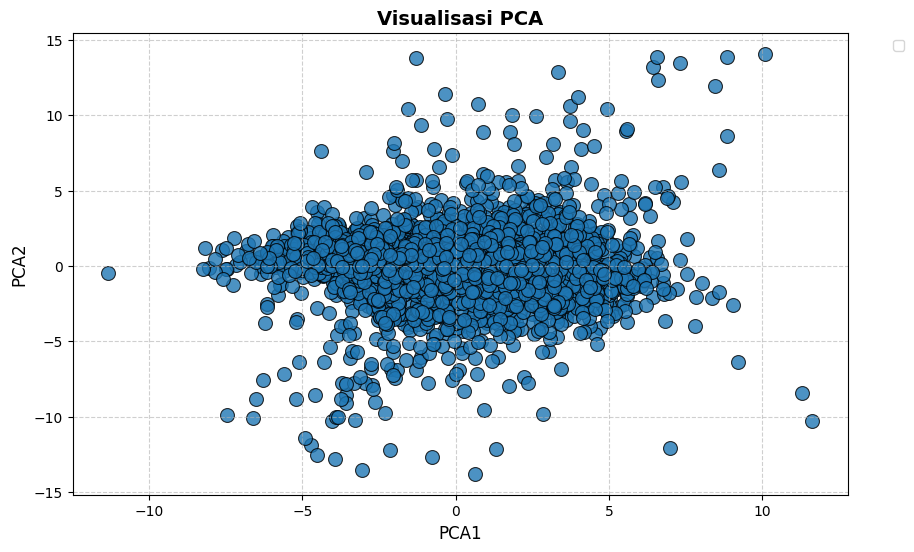

In [14]:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(data_scaled)
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]
visualisasi('Visualisasi PCA', 'PCA1', 'PCA2', None, df, 'viridis')

***Metode K- Means***

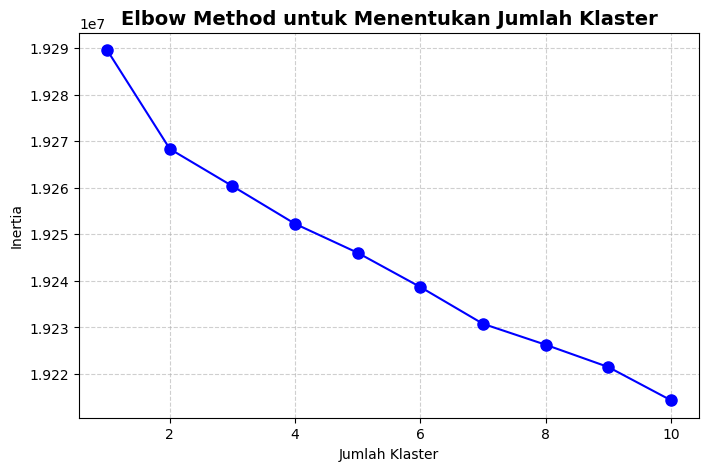

In [15]:
distortions = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(data_scaled)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), distortions, marker='o', linestyle='-', color='b', markersize=8)
plt.xlabel('Jumlah Klaster')
plt.ylabel('Inertia')
plt.title('Elbow Method untuk Menentukan Jumlah Klaster', fontsize=14, fontweight='bold')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

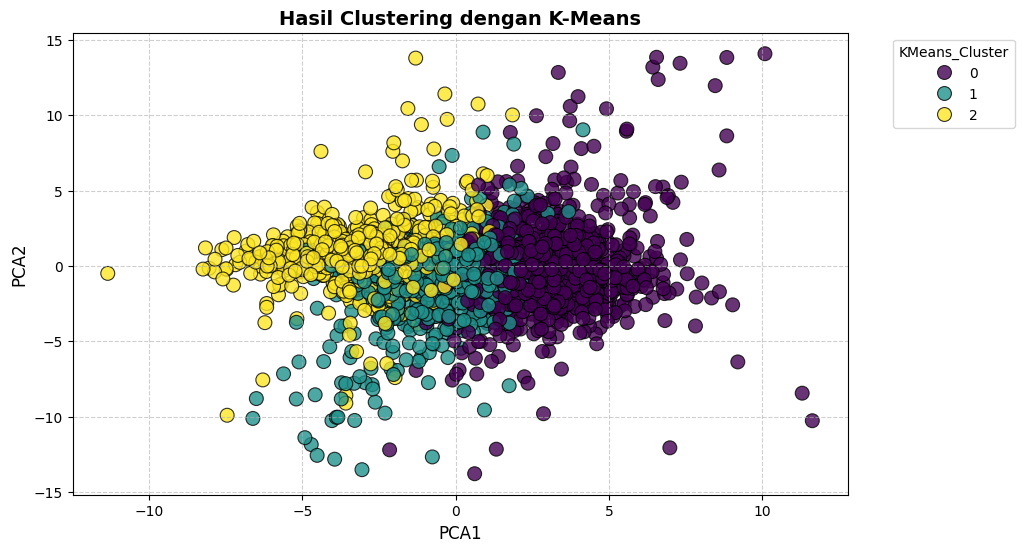

In [16]:
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['KMeans_Cluster'] = kmeans.fit_predict(data_scaled)
visualisasi('Hasil Clustering dengan K-Means', 'PCA1', 'PCA2', 'KMeans_Cluster', df, 'viridis')

***Metode Agglomerative Clustering***

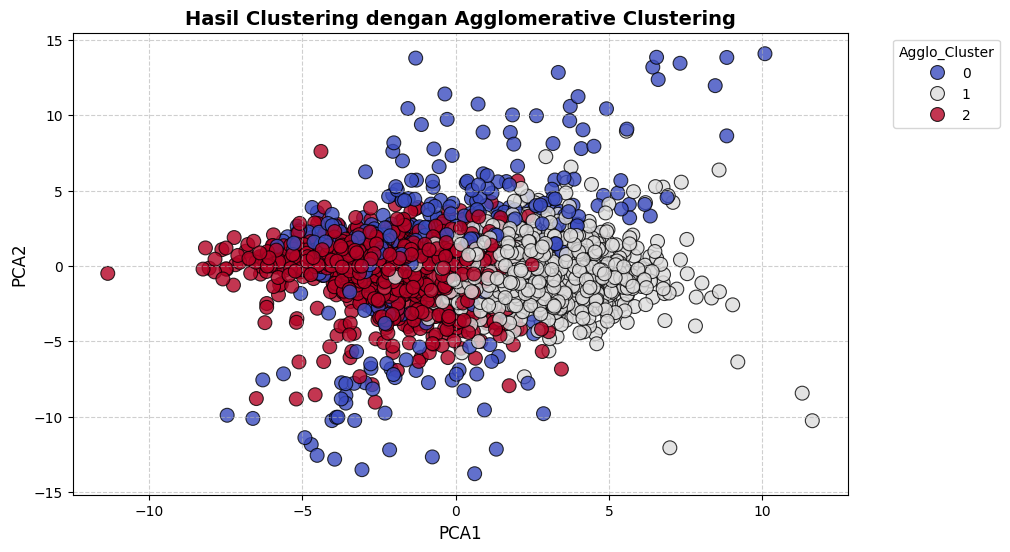

In [17]:
agglo = AgglomerativeClustering(n_clusters=3)
df['Agglo_Cluster'] = agglo.fit_predict(data_scaled)
visualisasi('Hasil Clustering dengan Agglomerative Clustering', 'PCA1', 'PCA2', 'Agglo_Cluster', df, 'coolwarm')


***Metode DBSCAN***

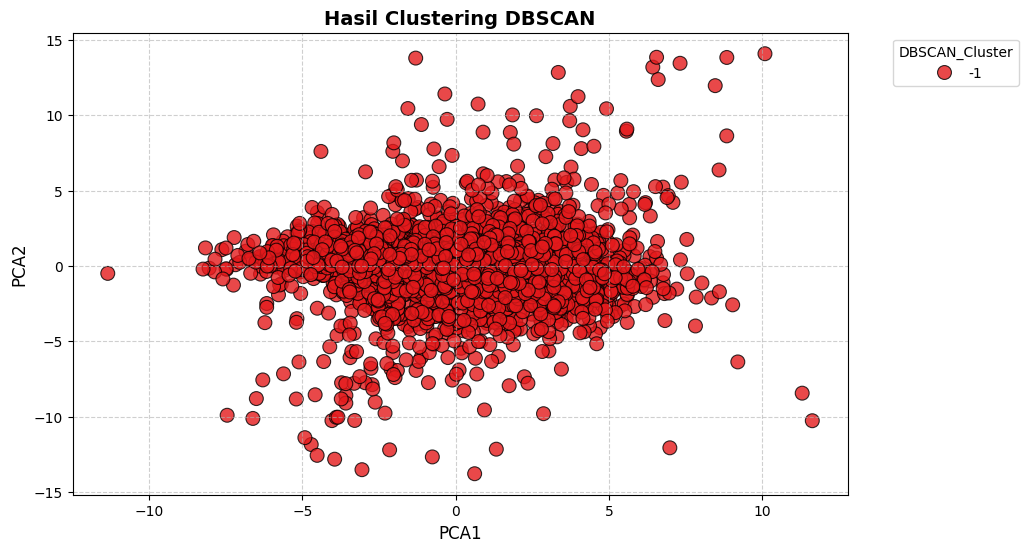

In [19]:
dbscan = DBSCAN(eps=2, min_samples=5)
df['DBSCAN_Cluster'] = dbscan.fit_predict(data_scaled)
visualisasi('Hasil Clustering DBSCAN', 'PCA1', 'PCA2', 'DBSCAN_Cluster', df, 'Set1')


***Metode t-SNE***

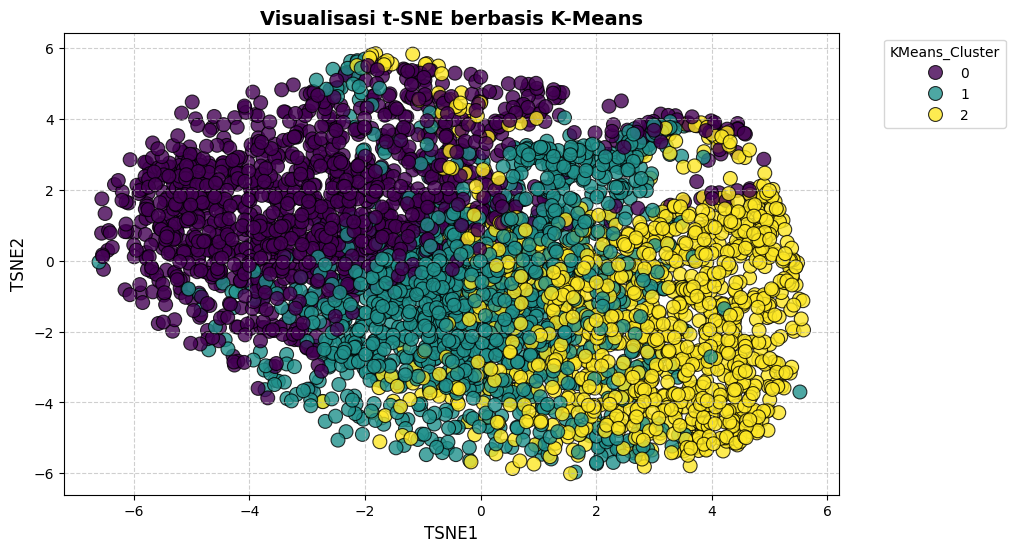

In [20]:
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
tsne_result = tsne.fit_transform(data_scaled)
df['TSNE1'] = tsne_result[:, 0]
df['TSNE2'] = tsne_result[:, 1]
visualisasi('Visualisasi t-SNE berbasis K-Means', 'TSNE1', 'TSNE2', 'KMeans_Cluster', df, 'viridis')


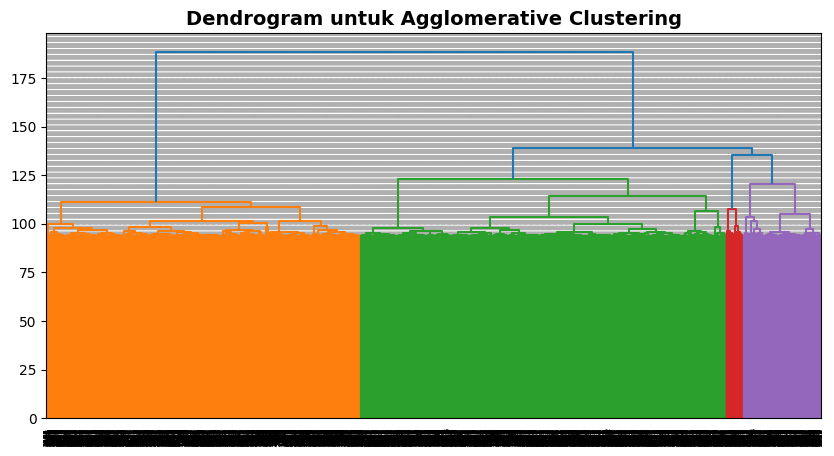

Analisis clustering selesai! Periksa visualisasi dan insight dari hasil yang diperoleh.
